**Jaden Armstrong** |
Project 3 | CSC 346 D01


---

Part 1 (SQL)

- Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.
- Display total count of countries after data cleaning.
- List of countries with the highest and lowest average mortality rates (years 2010-2015)
- List of countries with the highest and lowest average population (years 2010-2015)
- List of countries with the highest and lowest average GDP (years 2010-2015)
- List of countries with the highest and lowest average Schooling  (years 2010-2015)
- Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?
- Do densely populated countries tend to have lower life expectancy?


Delete all rows with population = 0. Perform further data cleaning for other attributes, as necessary.

In [ ]:
delete
from LifeExpectancy
where population = 0;


Zero rows were affected from this operation



---
Further data cleansing:
In this next step, I am seeking to impute the missing values from rows with the averages from other rows that are the country. In the scenario either all of the country's values are null in a column and/or there is only one instance of the country I will impute those values with the average of the entire data set

---

Impute averages for total_expenditure:

In [ ]:
CREATE TEMPORARY TABLE temp_avg_total_expenditure AS
SELECT Country, AVG(Total_Expenditure) AS avg_total_expenditure
FROM LifeExpectancy
WHERE Total_Expenditure IS NOT NULL
GROUP BY Country;

-- Update the rows with null Total_Expenditure values in the main table
UPDATE LifeExpectancy AS le1
JOIN temp_avg_total_expenditure AS avg_total_data
ON le1.Country = avg_total_data.Country
SET le1.Total_Expenditure = avg_total_data.avg_total_expenditure
WHERE le1.Total_Expenditure IS NULL;

-- Drop the temporary table
DROP TEMPORARY TABLE temp_avg_total_expenditure;

(181 rows were affects from this operation)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_alc AS
SELECT Country, AVG(Alcohol) AS avg_alc
FROM LifeExpectancy
WHERE alcohol IS NOT NULL GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_alc AS avg_alc_data ON le1.Country = avg_alc_data.Country
SET le1.Alcohol = avg_alc_data.avg_alc
WHERE le1.alcohol IS NULL;

(176 Rows were affected)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_bmi AS
SELECT Country, AVG(Bmi) AS avg_bmi
FROM LifeExpectancy
WHERE Bmi IS NOT NULL
GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_bmi AS avg_bmi_data ON le1.Country = avg_bmi_data.Country
SET le1.Bmi = avg_bmi_data.avg_bmi
WHERE le1.Bmi IS NULL;

(189 Rows were affected)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_pop AS
SELECT Country, AVG(Population) AS avg_pop
FROM LifeExpectancy
WHERE Population IS NOT NULL
GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_pop AS avg_pop_data ON le1.Country = avg_pop_data.Country
SET le1.Population = avg_pop_data.avg_pop
WHERE le1.Population IS NULL;

(4 Rows were affected)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_gdp AS SELECT Country, AVG(GDP) AS
avg_gdp FROM LifeExpectancy WHERE GDP IS NOT NULL GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_gdp AS avg_gdp_data ON le1.Country =
avg_gdp_data.Country SET le1.GDP = avg_gdp_data.avg_gdp WHERE
le1.GDP IS NULL;


(12 rows affected)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_schooling AS SELECT Country, AVG(schooling) AS avg_schooling
FROM LifeExpectancy
WHERE schooling > 0
GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_schooling AS avg_schooling_data
ON le1.Country = avg_schooling_data.Country
SET le1.schooling = avg_schooling_data.avg_schooling
WHERE le1.schooling = 0;

(1 Row affected)

In [ ]:
CREATE TEMPORARY TABLE temp_avg_Pe AS SELECT Country, AVG(Percentage_Expenditure) AS avg_Pe
FROM LifeExpectancy
WHERE Percentage_Expenditure != 0
GROUP BY Country;

UPDATE LifeExpectancy AS le1 JOIN temp_avg_pe AS avg_pe_data ON le1.Country = avg_pe_data.Country
SET le1.Percentage_Expenditure = avg_pe_data.avg_pe
WHERE le1.Percentage_Expenditure = 0;

(162 Rows affected)

Now that I have finished imputing the values in the rows where matching country has a value or average, I will move onto imputing the rest of the null values with the averages of ALL the data in the column.



I will run the following code to ensure the need to impute missing values

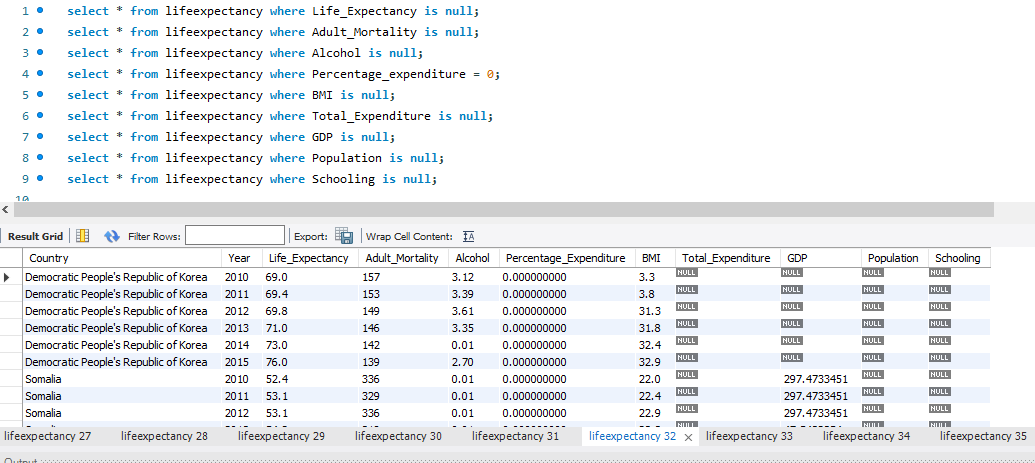

Now I will grab the averages for each of these groups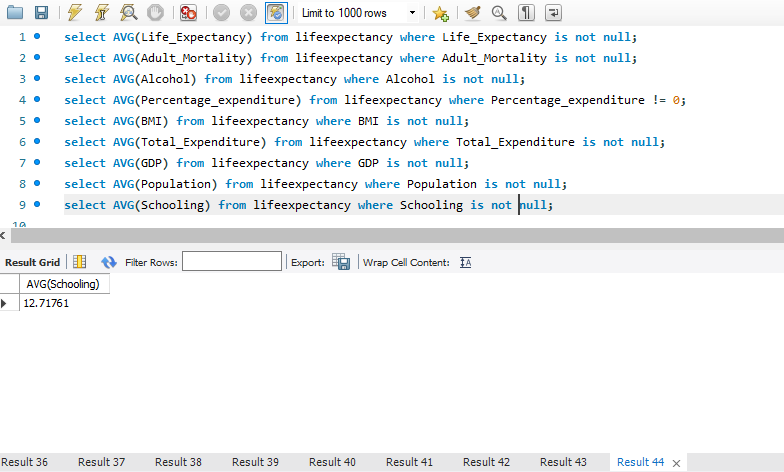

In [ ]:
AVG(Life_Expectancy) = 71.00155
AVG(Adult_Mortality) = 152.9180
AVG(Alcohol) = 4.231072
AVG(Percentage_expenditure) = 1095.4111635567279
AVG(BMI) = 40.73675
AVG(Total_Expenditure) = 6.183914
AVG(GDP) = 8706.02873767265
AVG(Population) = 13290802.147151
AVG(Schooling) = 12.71761

Now that I have the averages, I can impute these into the rest of the nulls or 0's in the data set with the following script

In [ ]:
Update lifeexpectancy set Schooling = 12.7 Where Schooling is null;
Update lifeexpectancy set Population = 13290802.1 Where Population is null;
Update lifeexpectancy set GDP = 8706 Where GDP is null;
Update lifeexpectancy set Total_Expenditure = 6.2 Where Total_Expenditure is null;
Update lifeexpectancy set BMI = 40.7 Where BMI is null;
Update lifeexpectancy set Percentage_expenditure = 1095.4 Where Percentage_expenditure = 0 OR Percentage_expenditure is null;
Update lifeexpectancy set Alcohol = 4.2 Where Alcohol is null;
Update lifeexpectancy set Adult_Mortality = 152.9 Where Adult_Mortality is null;
Update lifeexpectancy set Life_Expectancy = 71 Where Life_Expectancy is null;

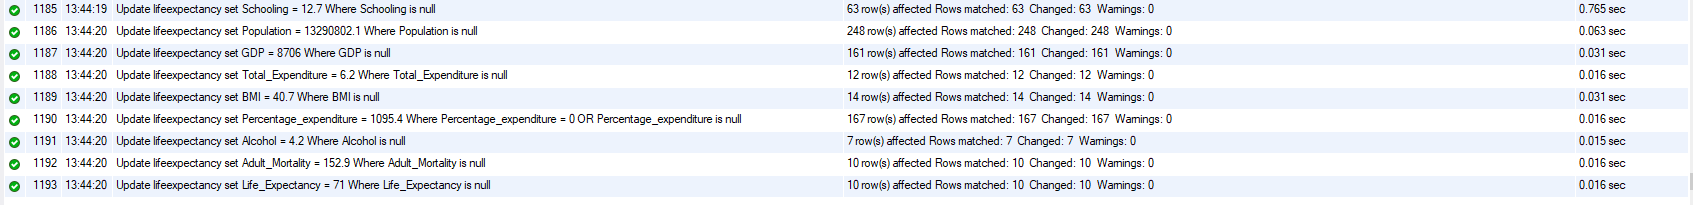

This concludes the Data cleansing in SQL

---



Display total count of countries after data cleaning

In [ ]:
select Count(Distinct country)
from LifeExpectancy

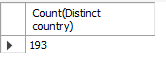

List of countries with the highest and lowest average mortality rates (years 2010-2015)

In [ ]:
select
    Country,
    AVG(Adult_Mortality) AS MinAvgMortality
from
	LifeExpectancy
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by minavgmortality ASC
limit 1;

select
    Country,
    AVG(Adult_Mortality) AS MaxAvgMortality
from
	LifeExpectancy
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by maxavgmortality DESC
limit 1

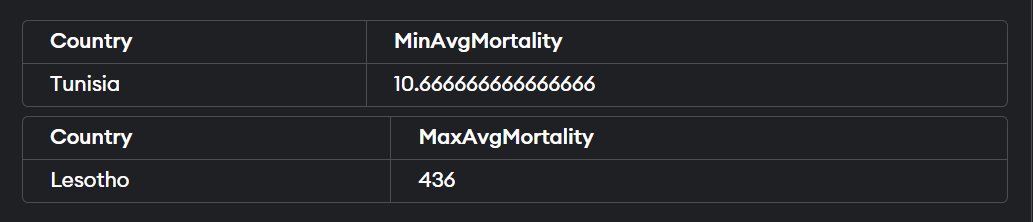

(Result is the same on mysql, I just kept this since it shows both results together)

List of countries with the highest and lowest average population (years 2010-2015)

In [ ]:
select
    Country,
    AVG(population) AS AvgPop
from
	adultmortality
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by avgpop ASC
limit 1;

select
    Country,
    AVG(population) AS AvgPop
from
	adultmortality
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by avgpop DESC
limit 1


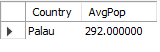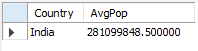

List of countries with the highest and lowest average GDP (years 2010-2015)

In [ ]:
select
    Country,
    AVG(GDP) AS AvgGDP
from
	LifeExpectancy
where
    Year BETWEEN 2010 AND 2015 AND
    gdp is not null
group by
    Country
Order by avggdp DESC
limit 1;

select
    Country,
    AVG(GDP) AS AvgGDP
from
	LifeExpectancy
where
    Year BETWEEN 2010 AND 2015 AND
    gdp is not null
group by
    Country
Order by avggdp ASC
limit 1


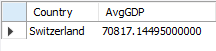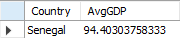

List of countries with the highest and lowest average Schooling  (years 2010-2015)

In [ ]:
select
    Country,
    AVG(Schooling) AS AvgSchooling
from
	  LifeExpectancy
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by avgschooling DESC
limit 1;

select
    Country,
    AVG(Schooling) AS AvgSchooling
from
	  LifeExpectancy
where
    Year BETWEEN 2010 AND 2015
group by
    Country
Order by avgschooling ASC
limit 1

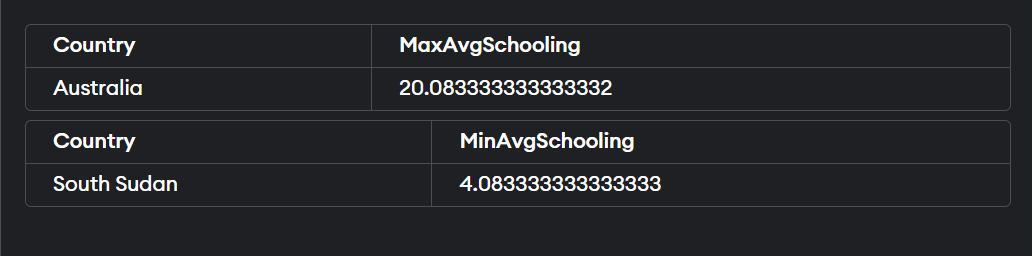

Which countries have the highest and lowest average alcohol consumption (years 2010-2015)?

In [ ]:
select
    Country,
    AVG(alcohol) AS MinAvgAlcohol
from
	  LifeExpectancy
where
    Year BETWEEN 2010 AND 2015 AND
    alcohol is not null
group by
    Country
Order by minavgalcohol ASC
limit 1;

select
    Country,
    AVG(alcohol) AS MaxAvgAlcohol
from
	  LifeExpectancy
where
    Year BETWEEN 2010 AND 2015 AND
    alcohol is not null
group by
    Country
Order by maxavgalcohol DESC
limit 1

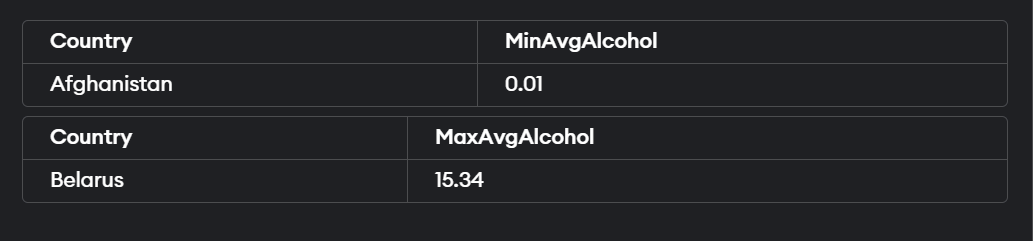

Do densely populated countries tend to have lower life expectancy?
To answer this last question, I used the following sql queries, the first will order by average Life_expectancy in ascending order and I can observe if countries with low life_expectancies are those with dense populations. The second query will filter by average population in descending order, this way I can see if countries with the highest populations tend to have low life_expectancies.

In [ ]:
select
	Country,
    avg(population) as Population,
    avg(Life_Expectancy) as Life_Expectancy
from
	LifeExpectancy
where
	year between 2010 and 2015
group by country
order by avg(life_expectancy) asc
limit 10;

select
	Country,
    avg(population) as Population,
    avg(Life_Expectancy) as Life_Expectancy
from
	LifeExpectancy
where
	year between 2010 and 2015
group by country
order by avg(population) desc
limit 10

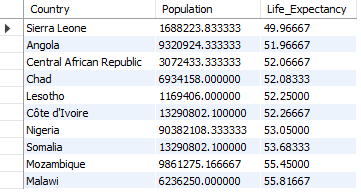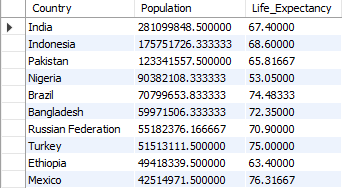

First, based on the results of the first query, it cannot be said that countries with the lowest life expectancy are those with the highest population density. Although that is not the question, that helps give additional insights to that question.
Second, it does seem at least slightly correlated that countries with a high population density have a tend to not have a high life expectancy. Although there are exceptions like Italy, that have one of the top 20 highest populations while also having one of the highest life_expectancies


---

Here, I decided to use another query to better answer this question. See code below. Using the tables generated before, I manually filter the top 10 lowest and highest populations.

In [ ]:
select
    avg(population) as Min_Populations,
    avg(Life_Expectancy) as Life_Expectancy
from
	LifeExpectancy
where
	year between 2010 and 2015
    AND population < 8600000
order by avg(population);

select
    avg(population) as Max_Populations,
    avg(Life_Expectancy) as Life_Expectancy
from
	LifeExpectancy
where
	year between 2010 and 2015
    AND population < 42000000
order by avg(population)



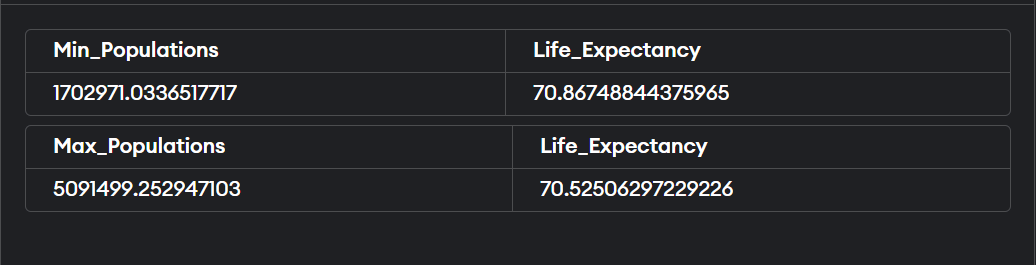

From this, we can see that the 10 countries with highest average population and 10 countries with the lowest average population have a very similar average life_expectancy. I think it is fair to say from this data, that countries with a higher population density do not tend to have a lower life expectancy.



---
**Part 2 (Python):**
See P3Python.ipynb in IDS - jarmstrong22